![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/763/9036e379b107b81bd603.jpg)


# Getting Started Code for [Rover Classification Challenge](www.aicrowd.com/challenges/rover-classification) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [4]:
!pip install --upgrade fastai 
!pip install aicrowd-cli==0.1

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.2.7)


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [5]:
API_KEY = 'ef7a6de81920f8871dd4807ae1327d69' #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [6]:
!aicrowd dataset download --challenge rover-classification -j 3 

sample_submission.csv:   0% 0.00/164k [00:00<?, ?B/s]
sample_submission.csv: 100% 164k/164k [00:00<00:00, 1.28MB/s]
sample_submission.csv: 100% 164k/164k [00:00<00:00, 1.27MB/s]
train.csv: 100% 689k/689k [00:00<00:00, 3.01MB/s]
train.zip:   0% 0.00/266M [00:00<?, ?B/s]
test.zip:   0% 0.00/66.4M [00:00<?, ?B/s]

val.csv: 100% 64.8k/64.8k [00:00<00:00, 904kB/s]


train.zip:  13% 33.6M/266M [00:02<00:14, 16.5MB/s]

val.zip: 100% 26.6M/26.6M [00:01<00:00, 22.0MB/s]
train.zip:  25% 67.1M/266M [00:03<00:11, 17.6MB/s]
train.zip:  38% 101M/266M [00:05<00:09, 18.1MB/s] 
test.zip: 100% 66.4M/66.4M [00:06<00:00, 9.55MB/s]
train.zip: 100% 266M/266M [00:13<00:00, 19.8MB/s]


In [7]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5499.jpg      
  inflating: data/test/55.jpg        
  inflating: data/test/550.jpg       
  inflating: data/test/5500.jpg      
  inflating: data/test/5501.jpg      
  inflating: data/test/5502.jpg      
  inflating: data/test/5503.jpg      
  inflating: data/test/5504.jpg      
  inflating: data/test/5505.jpg      
  inflating: data/test/5506.jpg      
  inflating: data/test/5507.jpg      
  inflating: data/test/5508.jpg      
  inflating: data/test/5509.jpg      
  inflating: data/test/551.jpg       
  inflating: data/test/5510.jpg      
  inflating: data/test/5511.jpg      
  inflating: data/test/5512.jpg      
  inflating: data/test/5513.jpg      
  inflating: data/test/5514.jpg      
  inflating: data/test/5515.jpg      
  inflating: data/test/5516.jpg      
  inflating: data/test/5517.jpg      
  inflating: data/test/5518.jpg      
  inflating: data/test/5519.jpg      
  inflating: data/test/552.jpg       


## Import packages

In [8]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [9]:
data_folder = "data"

In [10]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

## Visualize the data 👀

In [11]:
train_df

ImageID         label
0            0     curiosity
1            1     curiosity
2            2     curiosity
3            3  perseverance
4            4     curiosity
...        ...           ...
39995    39995     curiosity
39996    39996     curiosity
39997    39997     curiosity
39998    39998     curiosity
39999    39999     curiosity

[40000 rows x 2 columns]

In [12]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

ImageID         label
0          0.jpg     curiosity
1          1.jpg     curiosity
2          2.jpg     curiosity
3          3.jpg  perseverance
4          4.jpg     curiosity
...          ...           ...
39995  39995.jpg     curiosity
39996  39996.jpg     curiosity
39997  39997.jpg     curiosity
39998  39998.jpg     curiosity
39999  39999.jpg     curiosity

[40000 rows x 2 columns]

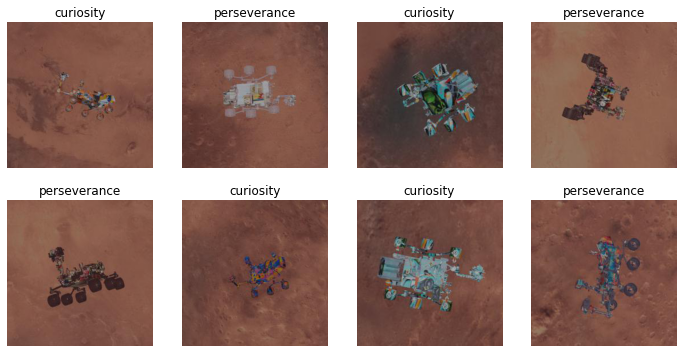

In [13]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=8)
dls.show_batch()

# TRAINING PHASE 🏋️

In [14]:
learn = cnn_learner(dls, alexnet, metrics=F1Score())

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


## Train the Model

In [15]:
learn.fine_tune(1)

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.# Prediction on Evaluation Set

## Load Test Set

Load the test data on which final submission is to be made.

In [16]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)

# Convert categorical values into label names
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'curiosity', 1: 'perseverance'}


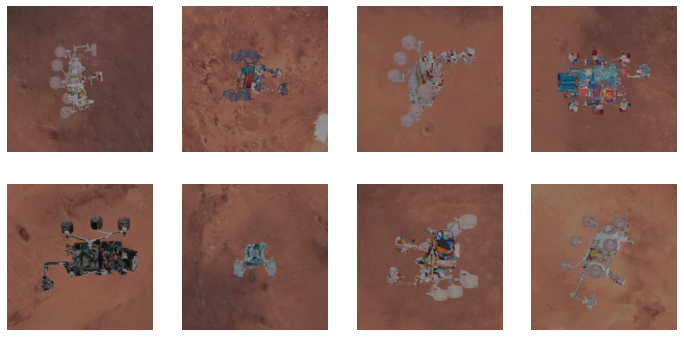

In [17]:
test_dls.show_batch()

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [18]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

## Save the prediction to csv

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [19]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

ImageID         label
0       4921  perseverance
1       3146  perseverance
2       8864  perseverance
3       4656  perseverance
4       5764  perseverance
...      ...           ...
9995    3605  perseverance
9996    1898  perseverance
9997    2658  perseverance
9998    6948  perseverance
9999    7100  perseverance

[10000 rows x 2 columns]

In [20]:
submission.to_csv("submission.csv", index=False)

## Making Direct Submission thought Aicrowd CLI

In [21]:
!aicrowd submission create -c rover-classification -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 180.5/178.9 KB • 711.2 kB/s • 0:00:00
                                    ╭─────────────────────────╮                                     
                                    │ Successfully submitted! │                                     
                                    ╰─────────────────────────╯                                     
                                          Important links                                           
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions/125927              │
│                  │                                                                               │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions?my_submissions=true │
│                  │                                                                               │
│      Lea